# Week 5 - Regression and Classification


In [1]:
!pip install --upgrade sklearn
!pip install --upgrade seaborn

    100% |████████████████████████████████| 7.2MB 26kB/s 
  Found existing installation: scikit-learn 0.17.1
    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling scikit-learn-0.17.1:
      Successfully uninstalled scikit-learn-0.17.1
  Using cached seaborn-0.7.1.tar.gz
  Running setup.py bdist_wheel for seaborn ... - \ | / done
  Stored in directory: /Users/agoncear/Library/Caches/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn
  Found existing installation: seaborn 0.7.0
    DEPRECATION: Uninstalling a distutils installed project (seaborn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

%matplotlib inline

## Introduction

In previous weeks we have looked at the steps needed in preparing different types of data for use by machine learning algorithms. This week we will consider two problems: regression and classification. In both cases we need to have a dataset for training a regressor or classifier. The dataset includes one or several numeric or categoric variables as input data (also called independent or explanatory variables) and a response variable that we are trying to predict based on input data.

* In case of regression, response variable (also called dependent variable) is a scalar and regressor is predicting its numeric value
* In case of classification, predicted dependent variable is categoric, denoting a class

Depending on the number of explanatory variables we distinguish
* Simple linear regression
* Multiple linear regression

In case of multiple dependent variables regression is called multivariate.

In classification problems we distinguish:
* binary classification (predicting on of the two classes)
* multiclass or multivariate classification (predicting one of more than two classes)
* multilabel classification (predicting several class labels out of more than two classes)

![ML Map](http://scikit-learn.org/stable/_static/ml_map.png)

In [3]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

# Description at http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements
# were obtained for each of n = 442 diabetes patients,
# as well as the response of interest, a quantitative measure of disease progression one year after baseline.

X = diabetes.data     # independent variables
y = diabetes.target   # dependent val

print(X.shape)
print(y.shape)

print(X[0,], y[0,])

(442, 10)
(442,)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613] 151.0


## Scikit learn approach

All the different models in scikit-learn follow a consistent structure:

* An instance of a regression/classifier class is initialized
* The fit() method takes the features and the target as the parameters X and y.
* The *predict()* method takes an array of features and returns the predicted values

These are the basic components with additional methods added when needed. For example, classifiers also have 

* A *predict_proba()* method that gives the probability that a sample belongs to each of the classes.
* A *predict_log_proba()* method that gives the log of the probability that a sample belongs to each of the classes.

Coefficients: 
 [ 949.43526038]
INPUT DATA [ 0.06169621]
PREDICTED 210.710038064
ACTUAL 151.0


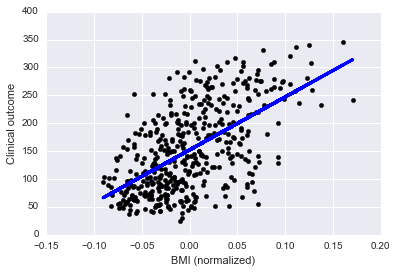

In [4]:
# General format:
# reg = Regression(initialization_params)
from sklearn import linear_model

bmi = X[:, 2].reshape(-1, 1)
outcome = y

reg = linear_model.LinearRegression()
reg.fit(bmi, outcome)
predicted_outcome = reg.predict(bmi)

# The coefficients
print('Coefficients: \n', reg.coef_)

# for the first data point
print("INPUT DATA", bmi[0])
print("PREDICTED", predicted_outcome[0])
print("ACTUAL", outcome[0])

# Plot outputs
plt.scatter(bmi, outcome, color='black')
plt.plot(bmi, predicted_outcome, 'b-', linewidth=3)
plt.xlabel("BMI (normalized)")
plt.ylabel("Clinical outcome")
plt.show()

## Evaluating models

Before we consider whether we have a good model, or which model to choose, we must first decide on how we will evaluate our models.

### Metrics

As part of our evaluation having a single number with which to compare models can be very useful. Choosing a metric that is as close a representation of our goal as possible enables many models to be automatically compared. This can be important when choosing model parameters or comparing different types of algorithm. 

Even if we have a metric we feel is reasonable it can be worthwhile considering in detail the predictions made by any model. Some questions to ask:

* Is the model sufficiently sensitive for our use case?
* Is the model sufficiently specific for our use case?
* Is there any systemic bias?
* Does the model perform equally well over the distribution of features?
* How does the model perform outside the range of the training data?
* Is the model overly dependent on one or two samples in the training dataset?

The metric we decide to use will depend on the type of problem we have (regression or classification) and what aspects of the prediction are most important to us. For example, a decision we might have to make is between:

* A model with intermediate errors for all samples
* A model with low errors for the majority of samples but with a small number of samples that have large errors.

For these two situations in a regression task we might choose mean_squared_error and mean_absolute_error.

There are lists for [regression metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) and [classification metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

We can apply the mean_squared_error metric to the linear regression model on the diabetes dataset:

In [5]:
error = predicted_outcome - outcome

# The mean squared error
print("Mean squared error: %.2f" % np.mean(error ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(bmi, outcome))


Mean squared error: 3890.46
Variance score: 0.34


In [6]:
# use a scikit learn function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print(mean_squared_error(predicted_outcome, outcome))

3890.45658546


In [7]:
import pandas as pd
data = pd.DataFrame(X, columns=['age', 'sex', 'bmi', 'map', 
                                'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
map    442 non-null float64
tc     442 non-null float64
ldl    442 non-null float64
hdl    442 non-null float64
tch    442 non-null float64
ltg    442 non-null float64
glu    442 non-null float64
dtypes: float64(10)
memory usage: 34.6 KB


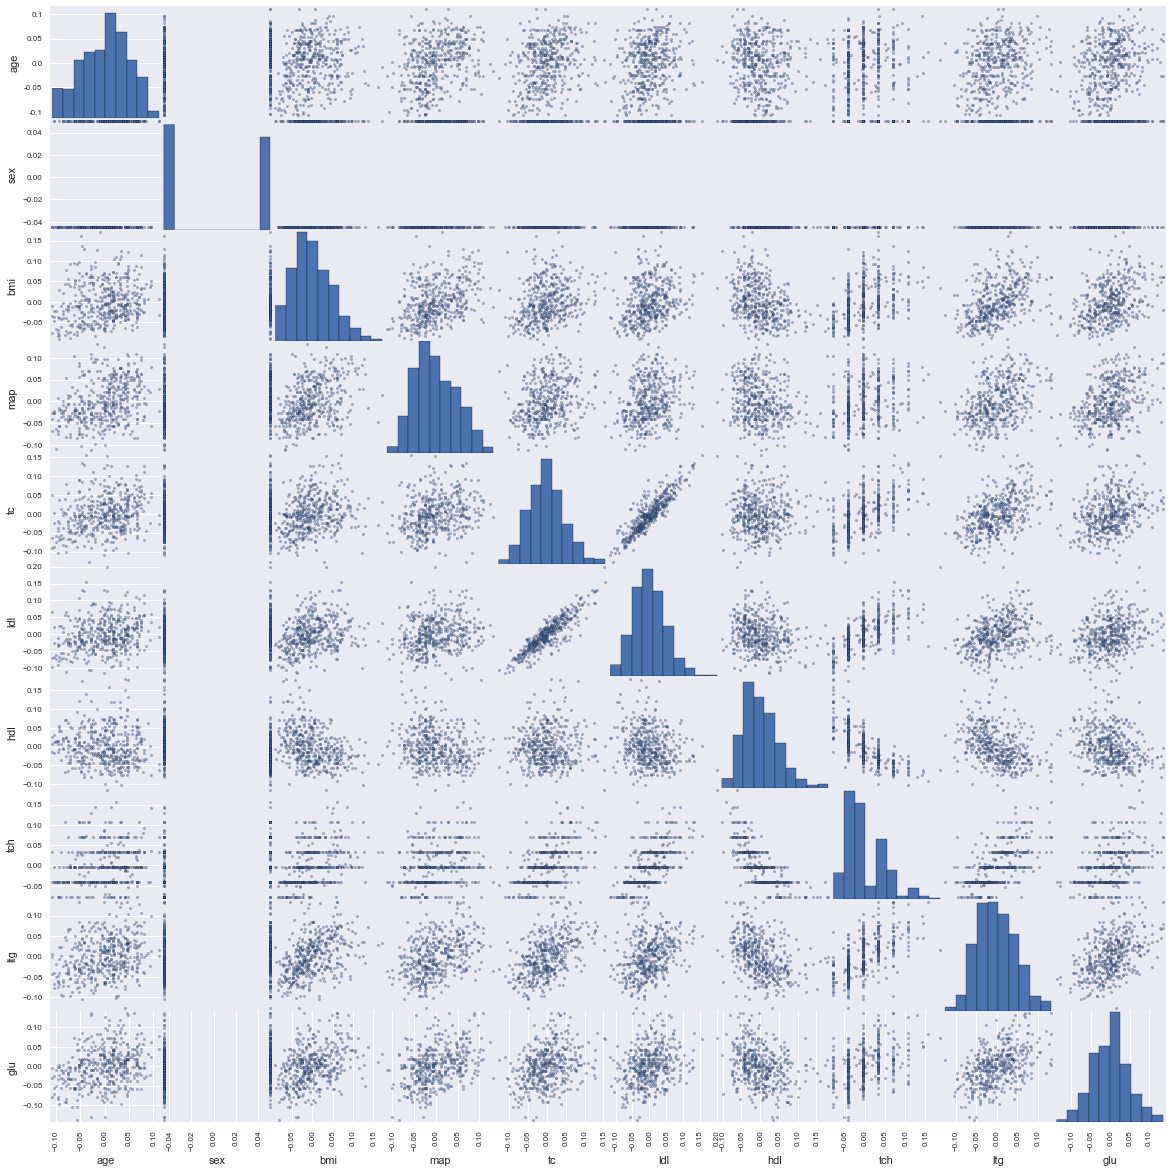

In [8]:
pd.scatter_matrix(data, figsize=(20,20))
plt.show()

### Multiple regression

$\hat{y} = f(X) =  \beta_{0}  +  \sum_{j=1}^p X_j\beta_j$

where $\beta$ are coefficients and $X_j$ are independent variables


Coefficients: 
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
INPUT DATA [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
PREDICTED 206.117069787
ACTUAL 151.0


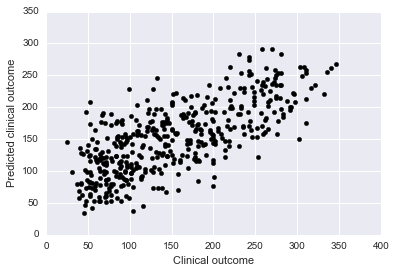

0.517749425413
0.517749425413


In [9]:
mult_reg = linear_model.LinearRegression()
mult_reg.fit(X, outcome)
predicted_outcome = mult_reg.predict(X)

# The coefficients
print('Coefficients: \n', mult_reg.coef_)

# for the first data point
print("INPUT DATA", X[0,])
print("PREDICTED", predicted_outcome[0])
print("ACTUAL", outcome[0])

# Plot outputs
plt.scatter(outcome, predicted_outcome, color='black')
plt.xlabel("Clinical outcome")
plt.ylabel("Predicted clinical outcome")
plt.show()


print(r2_score(outcome, predicted_outcome))
print(explained_variance_score(outcome, predicted_outcome))
# Note that R2 is equal to % explained variance

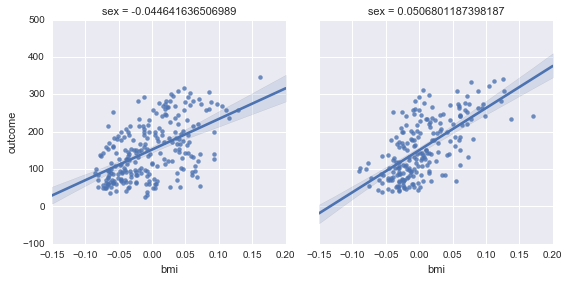

In [10]:
# exploring dependence between BMI and outcome stratified by sex
all_data = data
all_data['outcome'] = y
g = sns.lmplot(x="bmi", y="outcome", col="sex", data=all_data, size=4)
# Note that sex variable is categorical but it was normalized so it's values are numeric -0.05 and +0.05
plt.show()

## Supervised learning models in scikit learn

Scikit-learn includes a variety of [different models](http://scikit-learn.org/stable/supervised_learning.html). The most commonly used algorithms probably include the following:

* Regression
* Support Vector Machines
* Nearest neighbors
* Decision trees
* Ensembles & boosting

### Linear Regression

We have already seen several examples of simple and multiple linear regression.


### Support Vector Machines

Support vector machines attempt to project samples into a higher dimensional space such that they can be divided by a hyperplane. A good explanation can be found in [this article](http://noble.gs.washington.edu/papers/noble_what.html).

### Nearest neighbors

Nearest neighbor methods identify a number of samples from the training set that are close to the new sample and then return the average or most common value depending on the task. 

### Decision trees

Decision trees attempt to predict the value of a new sample by learning simple rules from the training samples.

### Ensembles & boosting

Ensembles are combinations of other models. Combining different models together can improve performance by boosting generalizability. An average or most common value from the models is returned.

Boosting builds one model and then attempts to reduce the errors with the next model. At each stage the bias in the model is reduced. In this way many weak predictors can be combined into one much more powerful predictor.

I often begin with an ensemble or boosting approach as they typically give very good performance without needing to be carefully optimized. Many of the other algorithms are sensitive to their parameters.

### Regression with Support Vector Machine



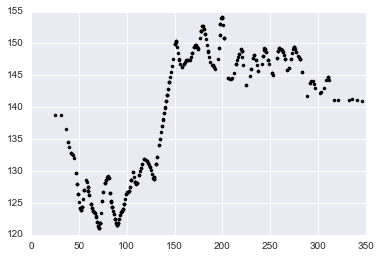

Coefficients: 
 [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
0.168518283946
0.204868822202


In [11]:
# https://en.wikipedia.org/wiki/Support_vector_machine#Regression
from sklearn import svm

reg = svm.SVR()
reg.fit(data, y)
y_hat = reg.predict(data)
plt.plot(y, y_hat, 'k.')
plt.show()

mult_reg.fit(X, outcome)
predicted_outcome = mult_reg.predict(X)

# The coefficients
print('Coefficients: \n', mult_reg.coef_)

print(r2_score(y, y_hat))
print(explained_variance_score(y, y_hat))
# Note that R2 is NOT equal to % explained variance

### Evaluating performance of the model. Permutation test

Limiting our model analysis to a single number, although initially seemingly unimpressive, gives us a variety of options. As one example, we can perform a permutation test to determine whether we might see this performance by chance.


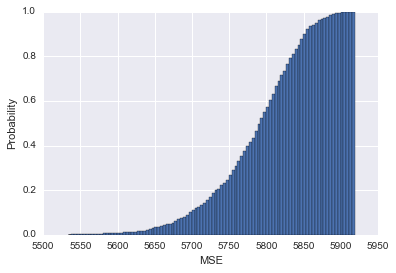

MSE = 1.57232471683e-27


In [12]:
reg = linear_model.LinearRegression()

errors = []
for i in range(1000):
    y_copy = y.copy()
    np.random.shuffle(y_copy)
    reg.fit(data, y_copy)
    y_predicted = reg.predict(data)
    mse = mean_squared_error(y_copy, y_predicted)
    errors.append(mse)

ee = pd.DataFrame(errors)
ee[0].hist(cumulative=True, normed=1, bins=100)
plt.ylim(0, 1)
plt.ylabel("Probability")
plt.xlabel("MSE")
plt.show()


reg.fit(data, y)
y_predicted = reg.predict(data)
mse = mean_squared_error(y, y_predicted)
print("MSE =", mse)



### Training, validation, and test datasets

When evaluating different models the approach taken above is not going to work. Particularly for models with high variance, that overfit the training data, we will get very good performance on the training data but perform no better than chance on new data.

For example, DecisionTreeRegressor and KNeighborsRegressor if poorly implemented will simply learn a one-to-one mapping of the data it is trained on.

KNN Regressor


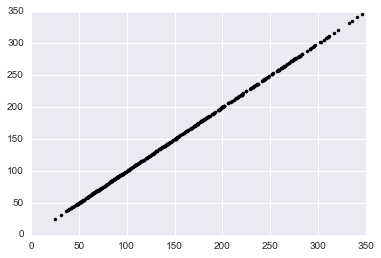

EVAR 1.0


Decision Tree Regressor


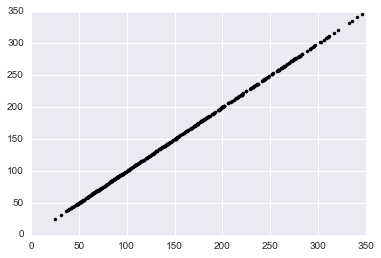

EVAR 1.0


In [14]:
from sklearn import neighbors
from sklearn import tree

print("KNN Regressor")
reg = neighbors.KNeighborsRegressor(n_neighbors=1)
reg.fit(data, y)
y_predicted = reg.predict(data)

plt.plot(y, y_predicted, 'k.')
plt.show()
print("EVAR", explained_variance_score(y, y_predicted))
                      
################                      
print("\n\nDecision Tree Regressor")
reg = tree.DecisionTreeRegressor(criterion='mse')
reg.fit(data, y)
y_predicted = reg.predict(data)

plt.plot(y, y_predicted, 'k.')
plt.show()
print("EVAR", explained_variance_score(y, y_predicted))

### Cross-Validation

To understand how our model truly performs we need to evaluate the performance on previously unseen samples. The general approach is to divide a dataset into training, validation and test datasets. Each model is trained on the **training dataset**. Multiple models can then be compared by evaluating the model against the **validation dataset**. There is still the potential of choosing a model that performs well on the validation dataset by chance so a final check is made against a **test dataset**.

This unfortunately means that part of our, often expensively gathered, data can't be used to train our model. Although it is important to leave out a test dataset an alternative approach can be used for the validation dataset. Rather than just building one model we can build multiple models, each time leaving out a different validation dataset. Our validation score is then the average across each of the models. This is known as **cross-validation**.

Scikit-learn provides classes to support cross-validation but a simple solution can also be implemented directly. Below we will separate out a test dataset to evaluate the nearest neighbor model.

http://scikit-learn.org/stable/modules/cross_validation.html

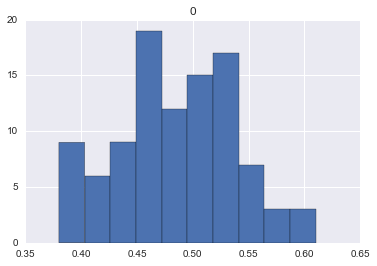

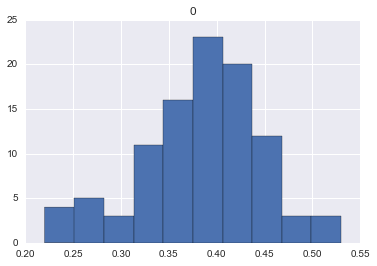

In [15]:
try:
    # scikit-learn 0.18
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split

def split_demo(clf):
    errors = []
    evars = []
    for i in range(100):
        # SPLIT INTO TRAIN & TEST
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

        # TRAINING BASED ON TRAINING
        clf.fit(X_train, y_train)

        # EVALUATE PERF. BASED ON TESTING:
        y_predicted = clf.predict(X_val)
        mse = mean_squared_error(y_val, y_predicted)
        errors.append(mse)
        evars.append(round(explained_variance_score(y_val, y_predicted), 2))
    return evars

errors_lr = split_demo(linear_model.LinearRegression())
pd.DataFrame(errors_lr).hist()
plt.show()

errors_knnr = split_demo(neighbors.KNeighborsRegressor(n_neighbors=5))
pd.DataFrame(errors_knnr).hist()
plt.show()

In [16]:
# Various ways to slice an array
a = np.arange(20) + 5
print(a)
print(a[[0,2,4]])
print(a[np.random.random(20) > 0.5])

mask = a < 10
print(mask)
print(a[mask])

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[5 7 9]
[ 6  8 10 14 17 18 20 21 22 23 24]
[ True  True  True  True  True False False False False False False False
 False False False False False False False False]
[5 6 7 8 9]


## Parameter selection

Many of the models require several different parameters to be specified. Their performance is typically heavily influenced by these parameters and choosing the best values is vital in developing the best model.

Some models have alternative implementations that handle parameter selection in an efficient way.

An example is [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html).

(10,)
Alpha chosen was  0.00375376715269
Variance explained 0.517422065602


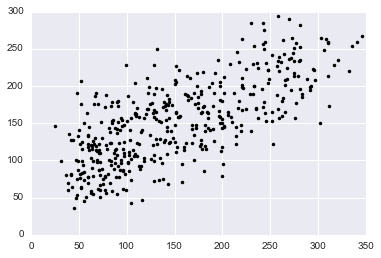

In [17]:
clf = linear_model.LassoCV(cv=5)
clf.fit(X, y)
print(clf.coef_.shape)
print('Alpha chosen was ', clf.alpha_)

plt.plot(y, clf.predict(X), 'k.')
print("Variance explained", explained_variance_score(
        y, clf.predict(X)))

There is an expanded example in [the documentation](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#example-linear-model-plot-lasso-model-selection-py).

There are also general classes to handle parameter selection for situations when dedicated classes are not available. As we will often have parameters in preprocessing steps these [general classes](http://scikit-learn.org/stable/modules/grid_search.html) will be used much more often.

In [18]:
from sklearn.model_selection import GridSearchCV

split = np.random.random(y.shape) > 0.3
X_train_test = X[split]
y_train_test = y[split]
X_validation = X[np.logical_not(split)]
y_validation = y[np.logical_not(split)]
print("TRAIN & TEST", X_train_test.shape)
print("VALIDATION", X_validation.shape)

knn = neighbors.KNeighborsRegressor(n_neighbors=1)

parameters = [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}]
g = GridSearchCV(knn, parameters, cv=5)

# Use Train_Test dataset. Grid Search will use cross-validation to split it into Train and Test subsets
g.fit(X_train_test, y_train_test)
best = g.best_params_
cv = g.cv_results_

print('GridSearch found optimal number of neighbors:', best['n_neighbors'])
print('Mean CV test scores are:', cv['mean_test_score'])

knn = neighbors.KNeighborsRegressor(n_neighbors = best['n_neighbors']) 
knn.fit(X_train_test, y_train_test)

# Use VALIDATION dataset
print('The MSE for the model is:', mean_squared_error(y_validation, knn.predict(X_validation)))

TRAIN & TEST (302, 10)
VALIDATION (140, 10)
GridSearch found optimal number of neighbors: 14
Mean CV test scores are: [-0.06633949  0.10728682  0.17116132  0.28024134  0.32234327  0.34373504
  0.34724853  0.36850151  0.37475413  0.39069769  0.395054    0.39923729
  0.40152447  0.41131245  0.40727992  0.40554308  0.40191646  0.39791095
  0.39361546  0.38941931]
The MSE for the model is: 2829.52718659


## Exercises

1. Load the handwritten digits dataset and choose an appropriate metric
2. Divide the data into a training and test dataset
4. Build a RandomForestClassifier on the training dataset, using cross-validation to evaluate performance
5. Choose another classification algorithm and apply it to the digits dataset. 
6. Use grid search to find the optimal parameters for the chosen algorithm.
7. Comparing the true values with the predictions from the best model identify the numbers that are most commonly confused.

(1797, 64)
(1797,)
Total 1797 examples
MSE: example for digit 0 compared to another example for digit 0 8.78125
MSE: example for digit 0 compared to examle for digit 4 41.328125
0


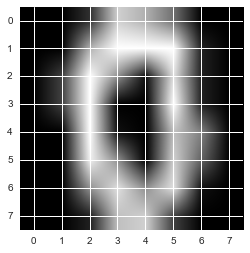

In [19]:
import sklearn.datasets

digits = sklearn.datasets.load_digits()

# X - how digits are handwritten
X = digits['data']

# y - what these digits actually are
y = digits['target']

print(X.shape)
print(y.shape)
print("Total 1797 examples")

print("MSE: example for digit 0 compared to another example for digit 0", mean_squared_error(X[0], X[10]))
print("MSE: example for digit 0 compared to examle for digit 4", mean_squared_error(X[0], X[400]))

print(y[10])
plt.imshow(X[20].reshape((8,8)),  cmap=plt.cm.gray)
plt.show()


## 